In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

### 1. Load the tips dataset from either pydataset or seaborn.

In [5]:
tips_df = sns.load_dataset('tips')

In [4]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

 *assuming X and y are already defined*
 
model = LinearRegression().fit(X, y)

predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [9]:
baseline = tips_df.tip.mean()

In [12]:
#baseline is mean of dependent variable
tips_df['baseline'] = baseline
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


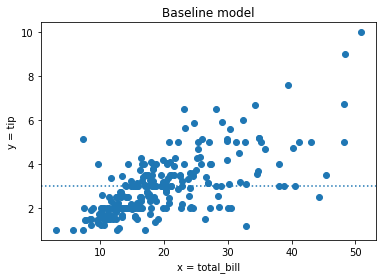

In [13]:
# plot data with baseline:

plt.scatter(tips_df.total_bill, tips_df.tip)
plt.axhline(tips_df.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

In [14]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(tips_df[['total_bill']], tips_df.tip)

# make prediction
tips_df['yhat'] = lm.predict(tips_df[['total_bill']])

tips_df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


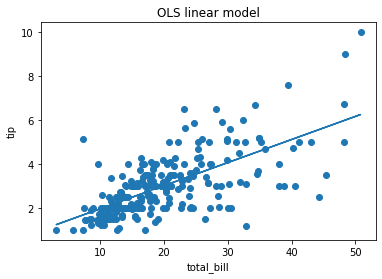

In [15]:
# visualize the line of best fit from OLS linear model
plt.scatter(tips_df.total_bill, tips_df.tip)
plt.plot(tips_df.total_bill, tips_df.yhat)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('OLS linear model');

In [16]:
# residual = actual - predicted
tips_df['residual'] = tips_df.tip - tips_df.yhat
tips_df['baseline_residual'] = tips_df.tip - tips_df.baseline

In [17]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


In [18]:
# sum of residual is zero
tips_df.residual.sum()

9.769962616701378e-14

In [19]:
# sum of baseline_residual
tips_df.baseline_residual.sum()

-2.4868995751603507e-14

### 3. Plot the residuals for the linear regression model that you made.

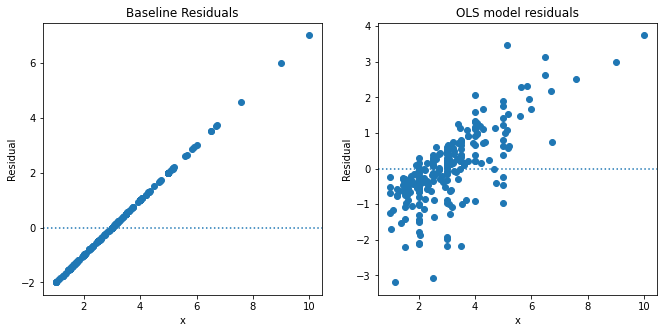

In [20]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips_df.tip, tips_df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips_df.tip, tips_df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [21]:
# first calculate the square of residuals

tips_df['residual^2'] = tips_df.residual**2
tips_df['baseline_residual^2'] = tips_df.baseline_residual**2

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [30]:
SSE = tips_df['residual^2'].sum()
print('SSE =', "{:.1f}".format(SSE))

SSE = 252.8


In [36]:
# Explained sum of squares
ESS = tips_df.yhat - tips_df.baseline

ESS

0     -0.293643
1     -0.992056
2      0.128556
3      0.408971
4      0.504544
         ...   
239    0.970853
240    0.776557
241    0.302897
242   -0.206472
243   -0.105649
Length: 244, dtype: float64

In [23]:
num_observations = len(tips_df)

In [32]:
MSE = SSE/num_observations
print("MSE = ", "{:.1f}".format(MSE))

MSE =  1.0


In [29]:
RMSE = sqrt(MSE)
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE =  1.0
RMSE baseline =  1.4


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [31]:
SSE_baseline = tips_df['baseline_residual^2'].sum()
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE Baseline = 465.2


In [33]:
MSE_baseline = SSE_baseline/num_observations
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE baseline =  1.9


In [34]:
RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE baseline =  1.4


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.